In [ ]:
#import libraies

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [ ]:
data = pd.read_csv('/content/sample_data/Corona_NLP_train.csv',encoding = "ISO-8859-1")
data.head()

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
0,3799,48751,London,16-03-2020,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral
1,3800,48752,UK,16-03-2020,advice Talk to your neighbours family to excha...,Positive
2,3801,48753,Vagabonds,16-03-2020,Coronavirus Australia: Woolworths to give elde...,Positive
3,3802,48754,NaN,16-03-2020,My food stock is not the only one which is emp...,Positive
4,3803,48755,NaN,16-03-2020,"Me, ready to go at supermarket during the #COV...",Extremely Negative


In [ ]:
tweet_df = data[['OriginalTweet','Sentiment']]
tweet_df.head()

,OriginalTweet,Sentiment
0,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral
1,advice Talk to your neighbours family to excha...,Positive
2,Coronavirus Australia: Woolworths to give elde...,Positive
3,My food stock is not the only one which is emp...,Positive
4,"Me, ready to go at supermarket during the #COV...",Extremely Negative


In [ ]:
tweet_df.shape

(41157, 2)

In [ ]:
tweet_df['Sentiment'].value_counts()

Positive              11422
Negative               9917
Neutral                7713
Extremely Positive     6624
Extremely Negative     5481
Name: Sentiment, dtype: int64

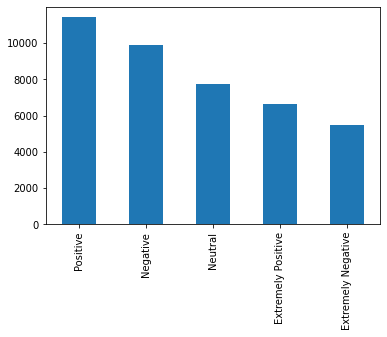

In [ ]:
tweet_df['Sentiment'].value_counts().plot(kind='bar')

In [ ]:
dic = {'Neutral':1, 'Positive':1,'Extremely Positive':1,'Negative':0,'Extremely Negative':0}
tweet_df['Sentiment'] = tweet_df['Sentiment'].replace(dic)
tweet_df.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,OriginalTweet,Sentiment
0,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,1
1,advice Talk to your neighbours family to excha...,1
2,Coronavirus Australia: Woolworths to give elde...,1
3,My food stock is not the only one which is emp...,1
4,"Me, ready to go at supermarket during the #COV...",0


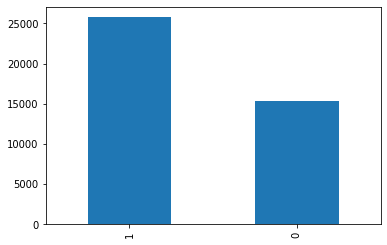

In [ ]:
tweet_df.Sentiment.value_counts().plot(kind='bar')

In [ ]:
words = ' '.join(tweet_df['OriginalTweet'])
print(words[:2000])












#toiletpapercrisis #covid_19 https://t.co/eVXkQLIdAZ Due to COVID-19 our retail store and classroom in Atlanta will not be open for walk-in business or classes for the next two weeks, beginning Monday, March 16.  We will continue to process online and phone orders as normal! Thank you for your understanding! https://t.co/kw91zJ5O5i For corona prevention,we should stop to buy things with the cash an


In [ ]:
df = tweet_df.loc[tweet_df['Sentiment']==0 ,:]
words = ' '.join(tweet_df['OriginalTweet'])

cleaned_word = " ".join([word for word in words.split()
                            if 'http' not in word
                             and not word.startswith('@')
                             and word != 'RT'
                           ])

In [ ]:
from wordcloud import WordCloud, STOPWORDS

In [ ]:
wordcloud = WordCloud(stopwords=STOPWORDS,
                     background_color='black',
                      width=1600,
                      height=800
                     ).generate(cleaned_word)

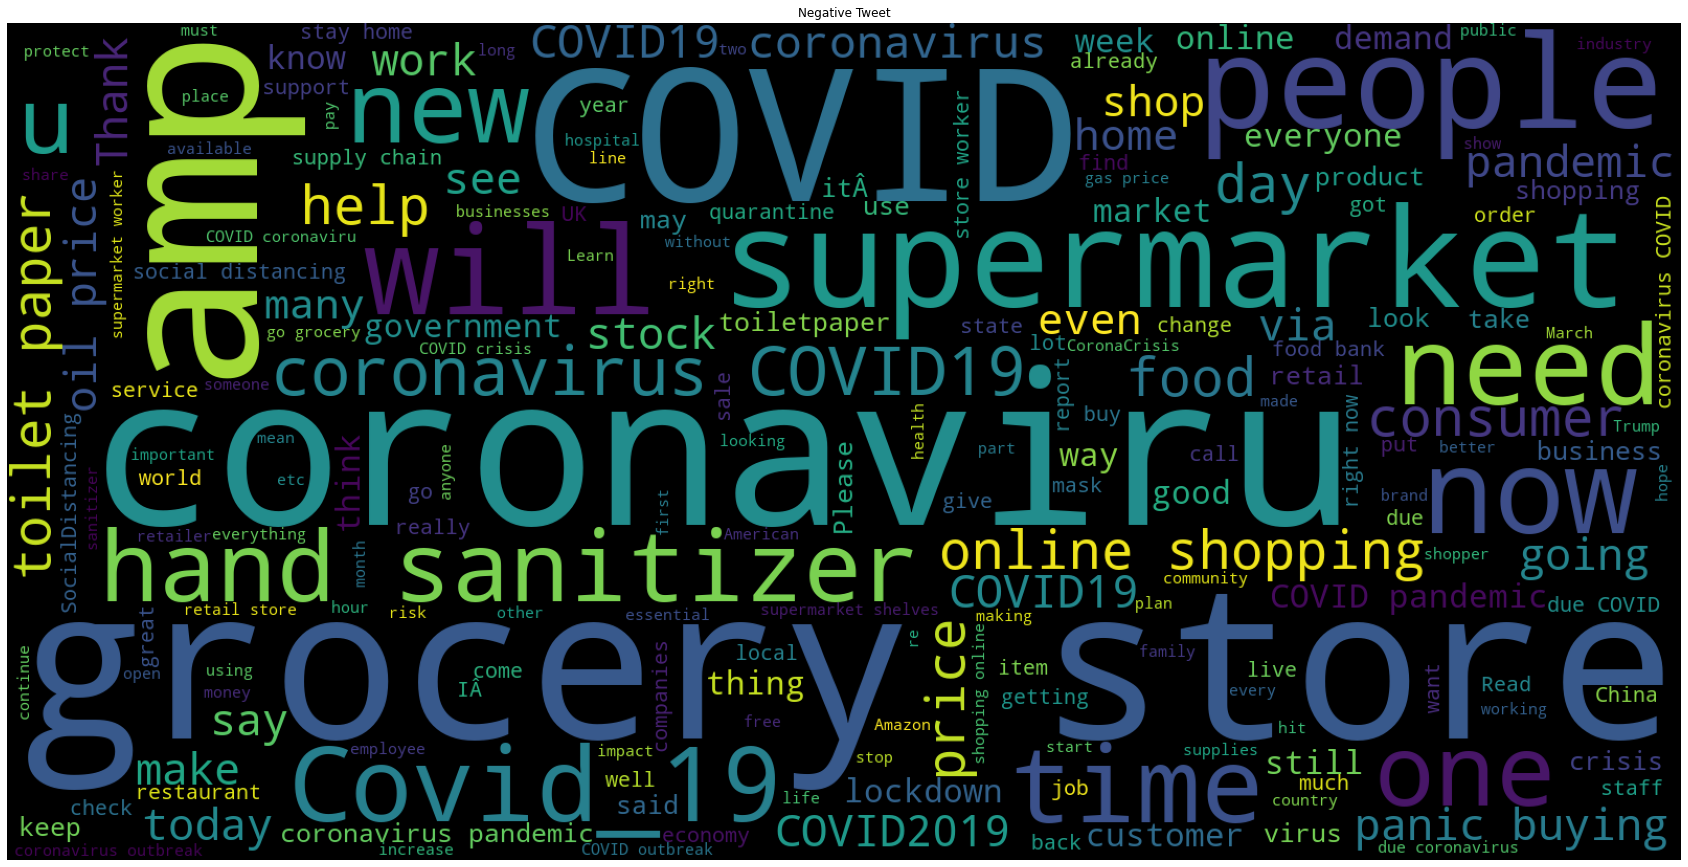

In [ ]:
plt.figure(1,figsize=(30,20))
plt.imshow(wordcloud)
plt.axis('off')
plt.title('Negative Tweet')
plt.show()

In [ ]:
## Data preprocessing

In [ ]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
import re

from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer


In [ ]:
stemmer = PorterStemmer()
lemmatizer = WordNetLemmatizer()

In [ ]:
def preprocess(raw_tweet):
 
    #removing special characters & digit
  letters_only = re.sub("[^a-zA-Z]"," ",raw_tweet)
    
    #change sentence to lower case
  letters_only = letters_only.lower()
    
    #tokenize into words
  words = letters_only.split()
    
    #remove stopwords
  words = [w for w in words if not w in stopwords.words('english')]
    
    #stemming/lemmatization

  words = [stemmer.stem(word) for word in words]
  clean_tweet_lst = " ".join(words) 
  
  return  clean_tweet_lst

In [ ]:
from tqdm import tqdm, tqdm_notebook

tqdm.pandas()

/usr/local/lib/python3.7/dist-packages/tqdm/std.py:658: FutureWarning: The Panel class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  from pandas import Panel


In [ ]:


tweet_df['clean_tweet_list'] = tweet_df['OriginalTweet'].progress_apply(lambda x: preprocess(x))


100%|██████████| 41157/41157 [02:53<00:00, 237.59it/s]
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [ ]:
tweet_df.shape

(41157, 3)

In [ ]:
tweet_df.head()

,OriginalTweet,Sentiment,clean_tweet_list
0,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,1,menyrbi phil gahan chrisitv http co ifz fan pa...
1,advice Talk to your neighbours family to excha...,1,advic talk neighbour famili exchang phone numb...
2,Coronavirus Australia: Woolworths to give elde...,1,coronaviru australia woolworth give elderli di...
3,My food stock is not the only one which is emp...,1,food stock one empti pleas panic enough food e...
4,"Me, ready to go at supermarket during the #COV...",0,readi go supermarket covid outbreak paranoid f...


In [ ]:
tweet = tweet_df[['Sentiment','clean_tweet_list']]
tweet.head()

,Sentiment,clean_tweet_list
0,1,menyrbi phil gahan chrisitv http co ifz fan pa...
1,1,advic talk neighbour famili exchang phone numb...
2,1,coronaviru australia woolworth give elderli di...
3,1,food stock one empti pleas panic enough food e...
4,0,readi go supermarket covid outbreak paranoid f...


In [ ]:
#spliting

from sklearn.model_selection import train_test_split
train,test = train_test_split(tweet,test_size = 0.3,random_state=42)

In [ ]:
train_clean_tweet = []
for i in train['clean_tweet_list']:
  train_clean_tweet.append(i)

test_clean_tweet = []
for i in test['clean_tweet_list']:
  test_clean_tweet.append(i)

In [ ]:
#Bag of words

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

vec = CountVectorizer(ngram_range=(1,2))
train_feature = vec.fit_transform(train_clean_tweet)

test_feature = vec.transform(test_clean_tweet)

In [ ]:
vec.vocabulary_

{'look': 190225,
 'massiv': 198820,
 'amount': 10154,
 'ceo': 42553,
 'pedophil': 235529,
 'step': 303030,
 'look massiv': 190477,
 'massiv amount': 198824,
 'amount ceo': 10169,
 'ceo pedophil': 42636,
 'pedophil step': 235530,
 'prais': 245838,
 'prepper': 246593,
 'thank': 319503,
 'commun': 66674,
 'liter': 186909,
 'wait': 346429,
 'day': 88375,
 'come': 65627,
 'onlin': 224588,
 'shop': 287727,
 'industri': 163604,
 'help': 149973,
 'prepar': 246428,
 'covid': 78727,
 'apocalyps': 14270,
 'http': 156960,
 'co': 50247,
 'fsnmac': 131139,
 'prais prepper': 245863,
 'prepper thank': 246604,
 'thank commun': 319579,
 'commun liter': 66822,
 'liter wait': 186983,
 'wait day': 346461,
 'day come': 88468,
 'come onlin': 65847,
 'onlin shop': 224994,
 'shop industri': 288185,
 'industri help': 163729,
 'help prepar': 150393,
 'prepar covid': 246452,
 'covid apocalyps': 78840,
 'apocalyps http': 14286,
 'http co': 156961,
 'co fsnmac': 53408,
 'best': 26527,
 'recip': 261801,
 'handmad': 

In [ ]:
##model building

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import  RandomForestClassifier

from sklearn.metrics import accuracy_score

In [ ]:
"""classifiers = [
              LogisticRegression(),
              DecisionTreeClassifier(),
              RandomForestClassifier(n_estimators=200)
]"""

'classifiers = [\n              LogisticRegression(),\n              DecisionTreeClassifier(),\n              RandomForestClassifier(n_estimators=200)\n]'

In [ ]:
log_model = LogisticRegression()

In [ ]:
log_model.fit(train_feature,train['Sentiment'])
pred = log_model.predict(test_feature)
accuracy = accuracy_score(pred,test['Sentiment'])

print('Accuracy of '+log_model.__class__.__name__+' is ' +str(accuracy))

Accuracy of LogisticRegression is 0.8437803692905733


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [ ]:
dtc_model = DecisionTreeClassifier()

In [ ]:
dtc_model.fit(train_feature,train['Sentiment'])
pred = dtc_model.predict(test_feature)
accuracy = accuracy_score(pred,test['Sentiment'])

print('Accuracy of '+dtc_model.__class__.__name__+' is ' +str(accuracy))

Accuracy of DecisionTreeClassifier is 0.7737285390346614


In [ ]:
rf_model = RandomForestClassifier(n_estimators=200)

In [ ]:
rf_model.fit(train_feature,train['Sentiment'])
pred = rf_model.predict(test_feature)
accuracy = accuracy_score(pred,test['Sentiment'])

print('Accuracy of '+rf_model.__class__.__name__+' is ' +str(accuracy))

Accuracy of RandomForestClassifier is 0.7844185293164885


In [ ]:
#saving the model and vectorizer pickel

In [ ]:
model = LogisticRegression()

model.fit(train_feature,train['Sentiment'])

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
from pickle import dump

In [ ]:
pkl_filename = "logit_model.pkl"
with open(pkl_filename, 'wb') as file:
    pickle.dump(model, file)

In [ ]:
pkl_filename = "countvectorizer.pkl"
with open(pkl_filename, 'wb') as file:
    pickle.dump(vec, file)

In [ ]:
# prediction the future data point
from pickle import load

from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import CountVectorizer

import nltk
nltk.download('stopwords')
import re

from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
def preprocess(raw_tweet):
 
    #removing special characters & digit
  letters_only = re.sub("[^a-zA-Z]"," ",raw_tweet)
    
    #change sentence to lower case
  letters_only = letters_only.lower()
    
    #tokenize into words
  words = letters_only.split()
    
    #remove stopwords
  words = [w for w in words if not w in stopwords.words('english')]
    
    #stemming/lemmatization

  words = [stemmer.stem(word) for word in words]
  clean_tweet_lst = " ".join(words) 
  
  return  clean_tweet_lst

In [ ]:
def predict(new_tweet):
  #loading pretrained CountVetcorizer from pickle file
  vectorizer = load(open('/content/countvectorizer.pkl', "rb"))

  #loading prediction logistics regression
  classifier = load(open('/content/logit_model.pkl',"rb"))

  #Preprocessing the tweet
  clean_tweet = preprocess(new_tweet)

  #converting text to numerical vector
  clean_tweet_encoded = vectorizer.transform([clean_tweet])

  #prediction
  prediction = classifier.predict(clean_tweet_encoded)

  return prediction

In [ ]:
new_tweet = input("Enter a tweet to check its sentiment: ")

prediction = predict(new_tweet)

print(prediction)

Enter a tweet to check its sentiment: No carelessness till there is a cure.
[1]
